In [16]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib, collections
from scipy.stats import norm
import imp, os, pickle
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore")
from matplotlib import collections  as mc

import sys
sys.path.insert(0, '../scripts/')
import data_loader, helper
sns.set(style="darkgrid")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
print "Setting random seeds"

Setting random seeds


In [10]:
# Loading the output of 'Exact distance l1.ipynb' on 100k cluster
cluster_distance = np.load('../datasets/rnaseq/cluster_1_100k_2000_points_l1.npy')
# best_arm = cluster_distance.argmin()
# best = cluster_distance[:,best_arm]
n = cluster_distance.shape[0]
cluster_distance_f = cluster_distance.flatten()
estimate = np.mean(cluster_distance, axis=0)

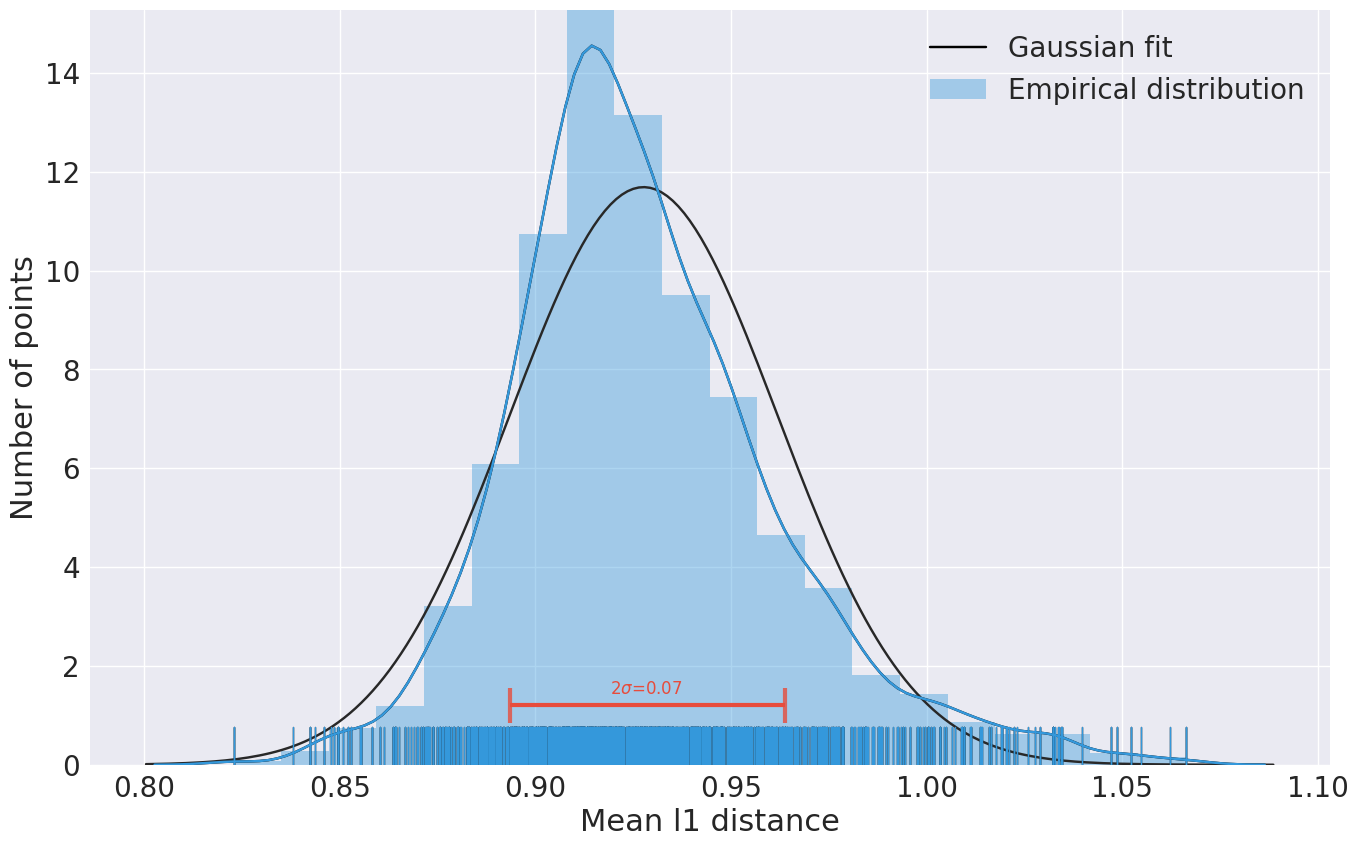

In [11]:
np.random.seed(10)
plt.figure(figsize=(16,10))
sns.set(font_scale = 2)
x = np.random.choice( estimate, size=2000,)
fig = sns.distplot(x, fit=norm, color='black', rug=True,hist=False, bins=20, label="Gaussian fit")
# fig.fill_between([estimate.mean()-estimate.std(), estimate.mean()+estimate.std()], [16,16], color=colors[1],alpha=0.2)
fig = sns.distplot(x, norm_hist=True, color=colors[1], rug=True, bins=20, label="Empirical distribution")
fig.set(xlabel="Mean l1 distance", ylabel="Number of points" )
# fig.set_title("Histogram of mean l1 distance")

gap =  .7
h_pos = 1.2
h_lines = [ [(estimate.mean()-estimate.std(), h_pos), (estimate.mean()+estimate.std(), h_pos)] ]
v_lines = [ [(estimate.mean()-estimate.std(), h_pos-gap/2), (estimate.mean()-estimate.std(), h_pos+gap/2)],
            [(estimate.mean()+estimate.std(), h_pos-gap/2), (estimate.mean()+estimate.std(), h_pos+gap/2)]  ]
h_lc = mc.LineCollection(h_lines, linewidths=3, colors=colors[3], alpha=1)
fig.add_collection(h_lc)
v_lc = mc.LineCollection(v_lines, linewidths=3, colors=colors[3], alpha=.8)
fig.add_collection(v_lc)
two_sigma = int(2*estimate.std()*100)/100.
fig.text(estimate.mean()-estimate.std()*.275, h_pos+gap/3, "$2\sigma$="+str(two_sigma), fontsize=12, color=colors[3])
# fig.set_yticklabels(fig.get_x fontsize = 15)
# fig.set_xticklabels(summary_rand_df.columns,  fontsize = 15)
# fig.set_xlabel(fig.get_xlabel(), fontsize=18)
# fig.set_ylabel(fig.get_ylabel(), fontsize=20)

fig.legend()
plt.show()

## Choosing 4 points and ploting their distance histogram

0 758
1 871
2 985
3 1077


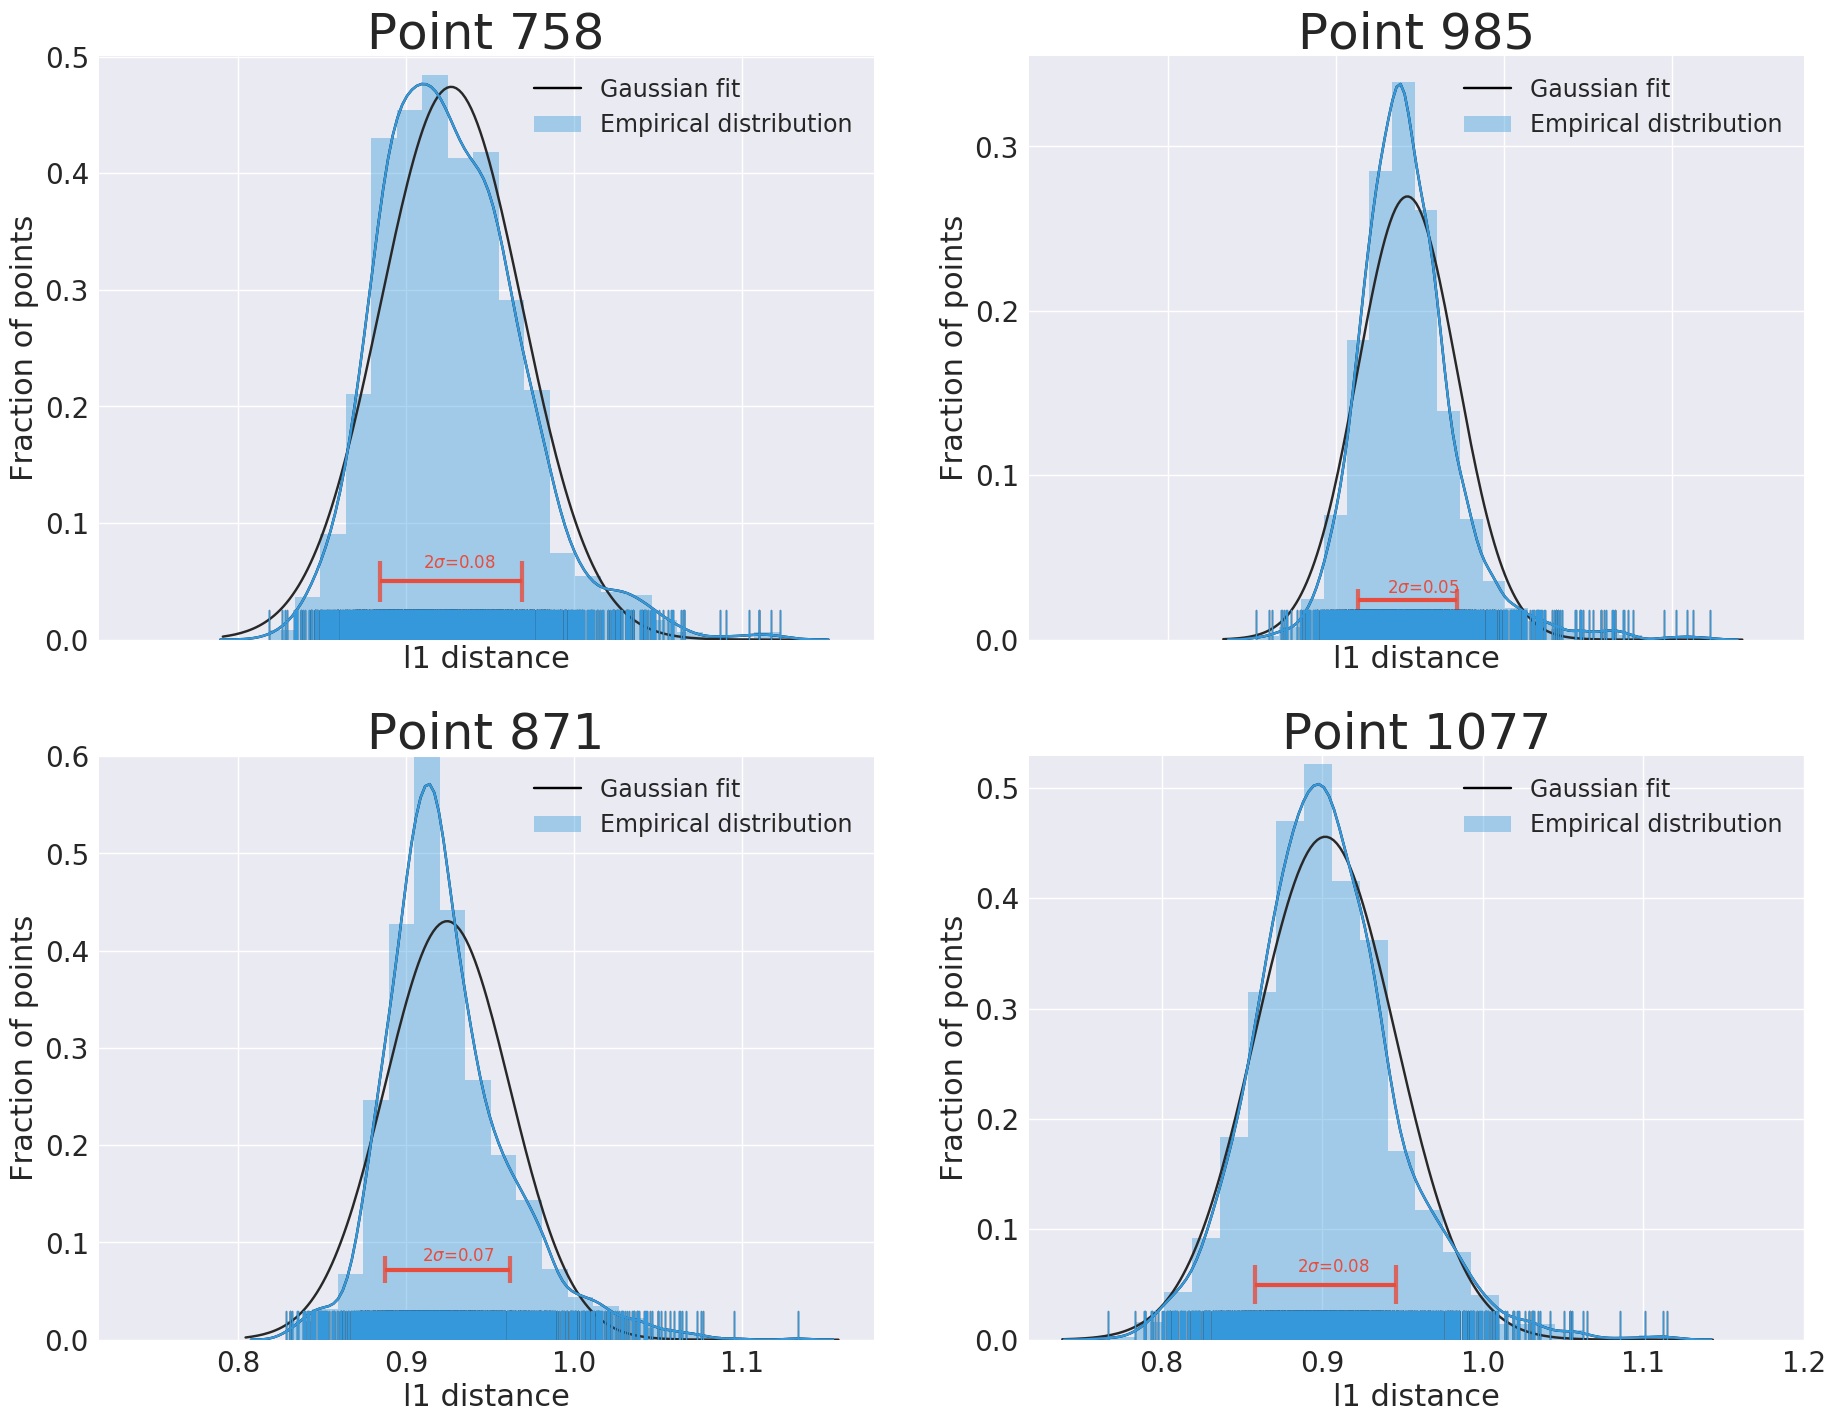

In [12]:
np.random.seed(11)
s = 2
indices =[758,871,985, 1077]
h_pos_array = [1,1.8,1.2,1]
indices.sort()
f, axes = plt.subplots(s, s, figsize=(22, 17), sharex=True)
sns.set(font_scale = 3)

for i in range(s*s):
    index = indices[i]
    print i, index
    #Sampling only 1000 points for each randomly chosen point to reduce computation time
    data = cluster_distance[:,index]
    data = np.random.choice( data, size=2000,)
    data = data[data.nonzero()]
    fig = sns.distplot(data, fit=norm, color='black', rug=True, 
                       hist=False, bins=20, label="Gaussian fit", ax=axes[i%s, i/s])
    fig = sns.distplot(data, norm_hist=True, color=colors[1], rug=True, 
                       bins=20, label="Empirical distribution", ax=axes[i%s, i/s])
    fig.set(xlabel="l1 distance",  ylabel="Fraction of points" )
    fig.set_xticks(np.arange(0.8, 1.25, .1))
    fig.set_yticklabels(np.arange(0,1,.1))

    gap =  .7
    h_pos = h_pos_array[i]
    h_lines = [ [(data.mean()-data.std(), h_pos), (data.mean()+data.std(), h_pos)] ]
    v_lines = [ [(data.mean()-data.std(), h_pos-gap/2), (data.mean()-data.std(), h_pos+gap/2)],
                [(data.mean()+data.std(), h_pos-gap/2), (data.mean()+data.std(), h_pos+gap/2)]  ]
    h_lc = mc.LineCollection(h_lines, linewidths=3, colors=colors[3], alpha=1)
    fig.add_collection(h_lc)
    v_lc = mc.LineCollection(v_lines, linewidths=3, colors=colors[3], alpha=.8)
    fig.add_collection(v_lc)
    two_sigma = int(2*data.std()*100)/100.
    fig.text(data.mean()-data.std()*.400, h_pos+gap/3, "$2\sigma$="+str(two_sigma), fontsize=12, color=colors[3])

    
    
    fig.legend(loc=1, prop={'size': 17})
    fig.set_title("Point "+str(index))

In [17]:
"""
def UCB(arg_tuple):
    exp_index   = arg_tuple[0]
    data_loader = arg_tuple[1]
    dataset_name= arg_tuple[2]
    dist_func   = arg_tuple[3]
    sigma       = arg_tuple[4]
    verbose     = arg_tuple[5]
    full_summary= arg_tuple[6]
"""
ftuple = (0, data_loader.load_rnaseq100k, "none", helper.l1_dist, sigma=0.01, False, TTrue )
# summary, left_over_array, low_lcb_arms, lcb, ucb, estimate = utils.UCB( data, report_time = 20 )

KeyboardInterrupt: 

In [33]:
fractional_values = np.array([1, .65, .5, .3, .1, .025, 0.01,  .0003, 0.00001, 0.000001])
index = 0
fractional_positions = np.zeros_like(fractional_values)
for i, row in enumerate(left_over_array):
    frac = row[0].shape[0]/110000.0
#     if frac > fractional_values[index]:
    try:
        fractional_positions[np.where(fractional_values<frac)[0][0]] = i
    except:
        print np.where(fractional_values<frac)[0], frac,i
#     else:
#         index += 1
print fractional_positions

# order, estimate, lcb, ucb, summary_old = utils.UCB( gene_matrix_normalised, report_time = 20, init_size = 4 )
size = 100
size_array = [0]
total_size=  0
for i, index in enumerate(fractional_positions):
    current_size = min(size, left_over_array[int(index)][0].shape[0])
    total_size += current_size
    size_array += [total_size]
print size_array
summary_df = pd.DataFrame(data=np.zeros((total_size, 2)), columns=['step', 'arm'], dtype=int)
for i, index in enumerate(fractional_positions):
    current_size = left_over_array[int(index)][0].shape[0]
    summary_df.iloc[size_array[i]:size_array[i+1]]['step'] = i
    summary_df.iloc[size_array[i]:size_array[i+1]]['arm'] = \
    np.random.choice( summary[int(index)][0][:current_size],size= min(size,current_size), replace=False)


pos = np.unique(np.array(summary_df['arm']))
print pos.shape
summary_df

distance = pairwise_distances(
                    gene_matrix_normalised, 
                    gene_matrix_normalised[pos],
                    metric='l1',
                    n_jobs=1)
df_dist = pd.DataFrame(data=np.vstack( [pos, distance.mean(axis=0)] ).T, columns=['arm', 'mean'] , dtype='float')
df_final = df_dist.merge(summary_df.astype('float'), right_on='arm', left_on='arm').sort_values('step')
df_final

/home/govinda/anaconda/envs/bandits/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/govinda/anaconda/envs/bandits/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[    0.   596.  1087.  1563.  2303.  2746.  2856.  2912.  4719.  4884.]
[0, 100, 200, 300, 400, 500, 600, 700, 778, 780, 781]
(749,)


,arm,mean,step
346,61496.0,0.880801,0.0
301,54209.0,0.951740,0.0
159,32039.0,0.974167,0.0
158,31970.0,0.905324,0.0
304,54470.0,0.912438,0.0
155,31155.0,0.947414,0.0
307,55075.0,0.960197,0.0
309,55407.0,0.946803,0.0
310,55619.0,0.980408,0.0
314,56468.0,0.964966,0.0


In [103]:
np.min(df_final['mean'])

0.82293195394831209

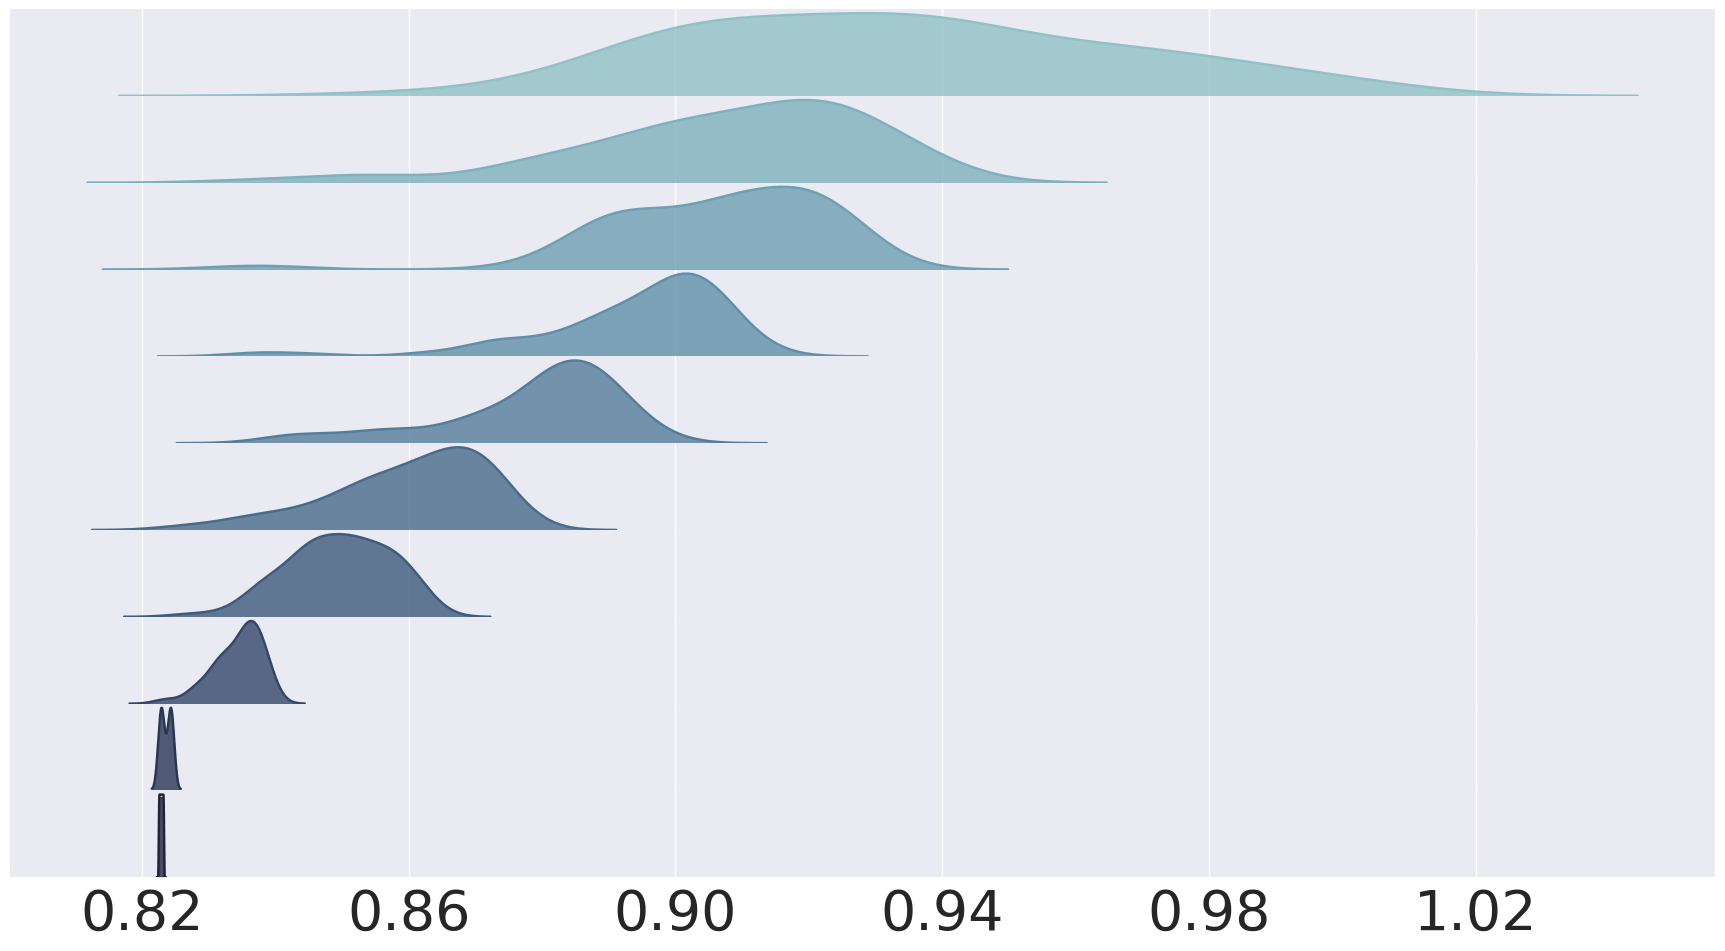

In [108]:
min_mu = np.array(df_final.iloc[-1])[1]
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
colors = pal.as_hex()
sns.set(font_scale = 3)
f, axes = plt.subplots(len(fractional_positions), figsize=(22, len(fractional_positions)*1.15), sharex=True)
for i in range(len(fractional_positions[:-1])):
    fig = sns.kdeplot( np.array(df_final.loc[df_final['step']==i]['mean']),\
                       ax=axes[i], color=colors[i%10], kernel='gau')
    x, y = fig.get_lines()[0].get_data()
    fig.set_yticks([])
    fig.set_xticks(np.arange(0.82,1.2,.04))
    fig.fill_between(x,y,0, alpha=.8, color=colors[i%10])
    f.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
#     ax.text(-.04, len(fractional_positions) - i - .75, str(i*100/9)+"%", fontweight="bold", color=colors[i%10], 
#             ha="left", va="center", transform=ax.transAxes, fontsize=16)
i = i + 1
final_mean = np.array(df_final.loc[df_final['step']==i]['mean'])[0]
x = np.arange(final_mean-.0004,final_mean+.0004,.00001)
y = 0.03*np.ones_like(x)
fig = sns.kdeplot( x, ax=axes[i], color=colors[i%10], kernel='cos')
# x, y = fig.get_lines()[0].get_data()
fig.fill_between(x, y*40500, 0, alpha=.8, color=colors[-1])
fig.set_yticks([])
# ax.text(-.04, len(fractional_positions) - i - .75, str(i*100/9)+"%", fontweight="bold", color=colors[i%10], 
#             ha="left", va="center", transform=ax.transAxes, fontsize=16)
# plt.stem(, [.03], color=colors[i], linewidth=5, MarkerSize=30, linefmt='b')
plt.show()

In [64]:
left_over_summary = np.zeros(len(left_over_array))
n = cluster_distance.shape[0]
for i in range(len(left_over_array)):
    left_over_summary[i] = left_over_array[i][0].shape[0]/(0.0+n)

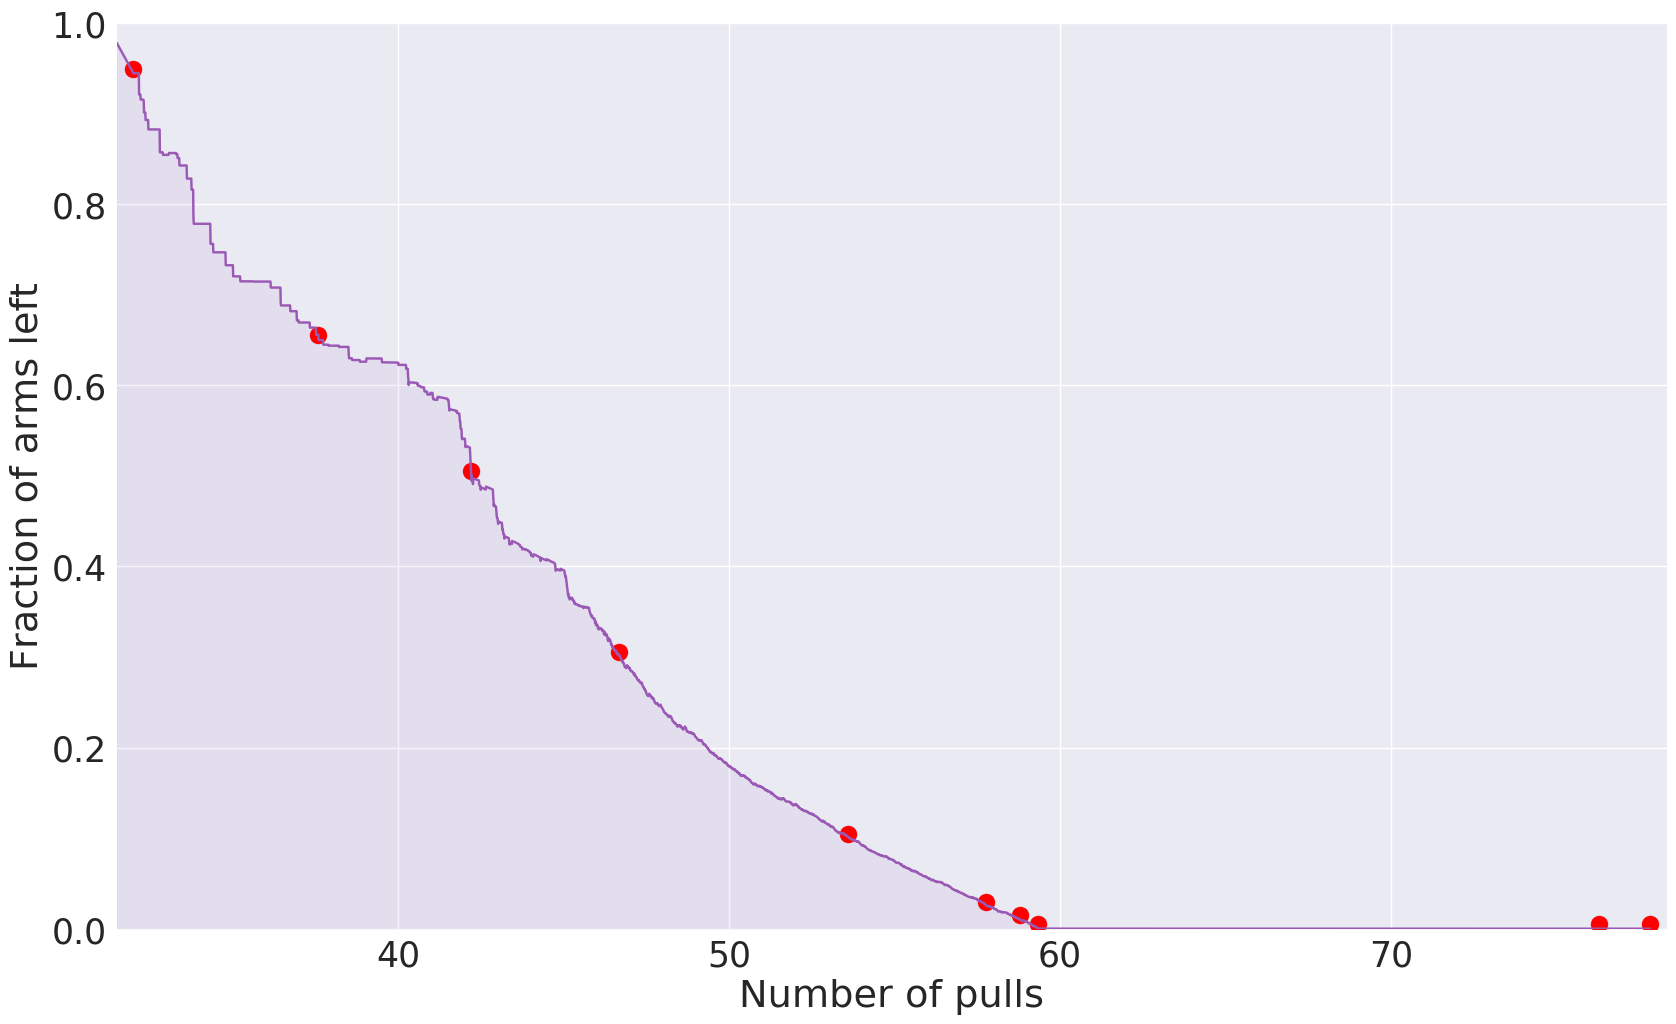

In [111]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig = plt.figure(figsize=(20,12))
x = 32+32*32.*np.arange(0,len(left_over_summary))/n
y = left_over_summary
sns.set(font_scale = 2.5)
x_shade = x.copy()
x_shade[0] -= 0.5
plt.plot(x_shade,y,color=colors[0])
plt.fill_between(x_shade, y, 0, color=colors[0], alpha=0.08)
fractional_values_p = fractional_values.copy()
fractional_values_p[0] = np.max(y[10:])
plt.scatter(32+32*32.*fractional_positions/n, fractional_values_p+0.005, color='red', s=150)
plt.ylabel("Fraction of arms left")
plt.xlabel("Number of distance evaluations per armw")
plt.xlim(min(x)-0.5,max(x)+0.5)
plt.ylim(0,1)
plt.show()

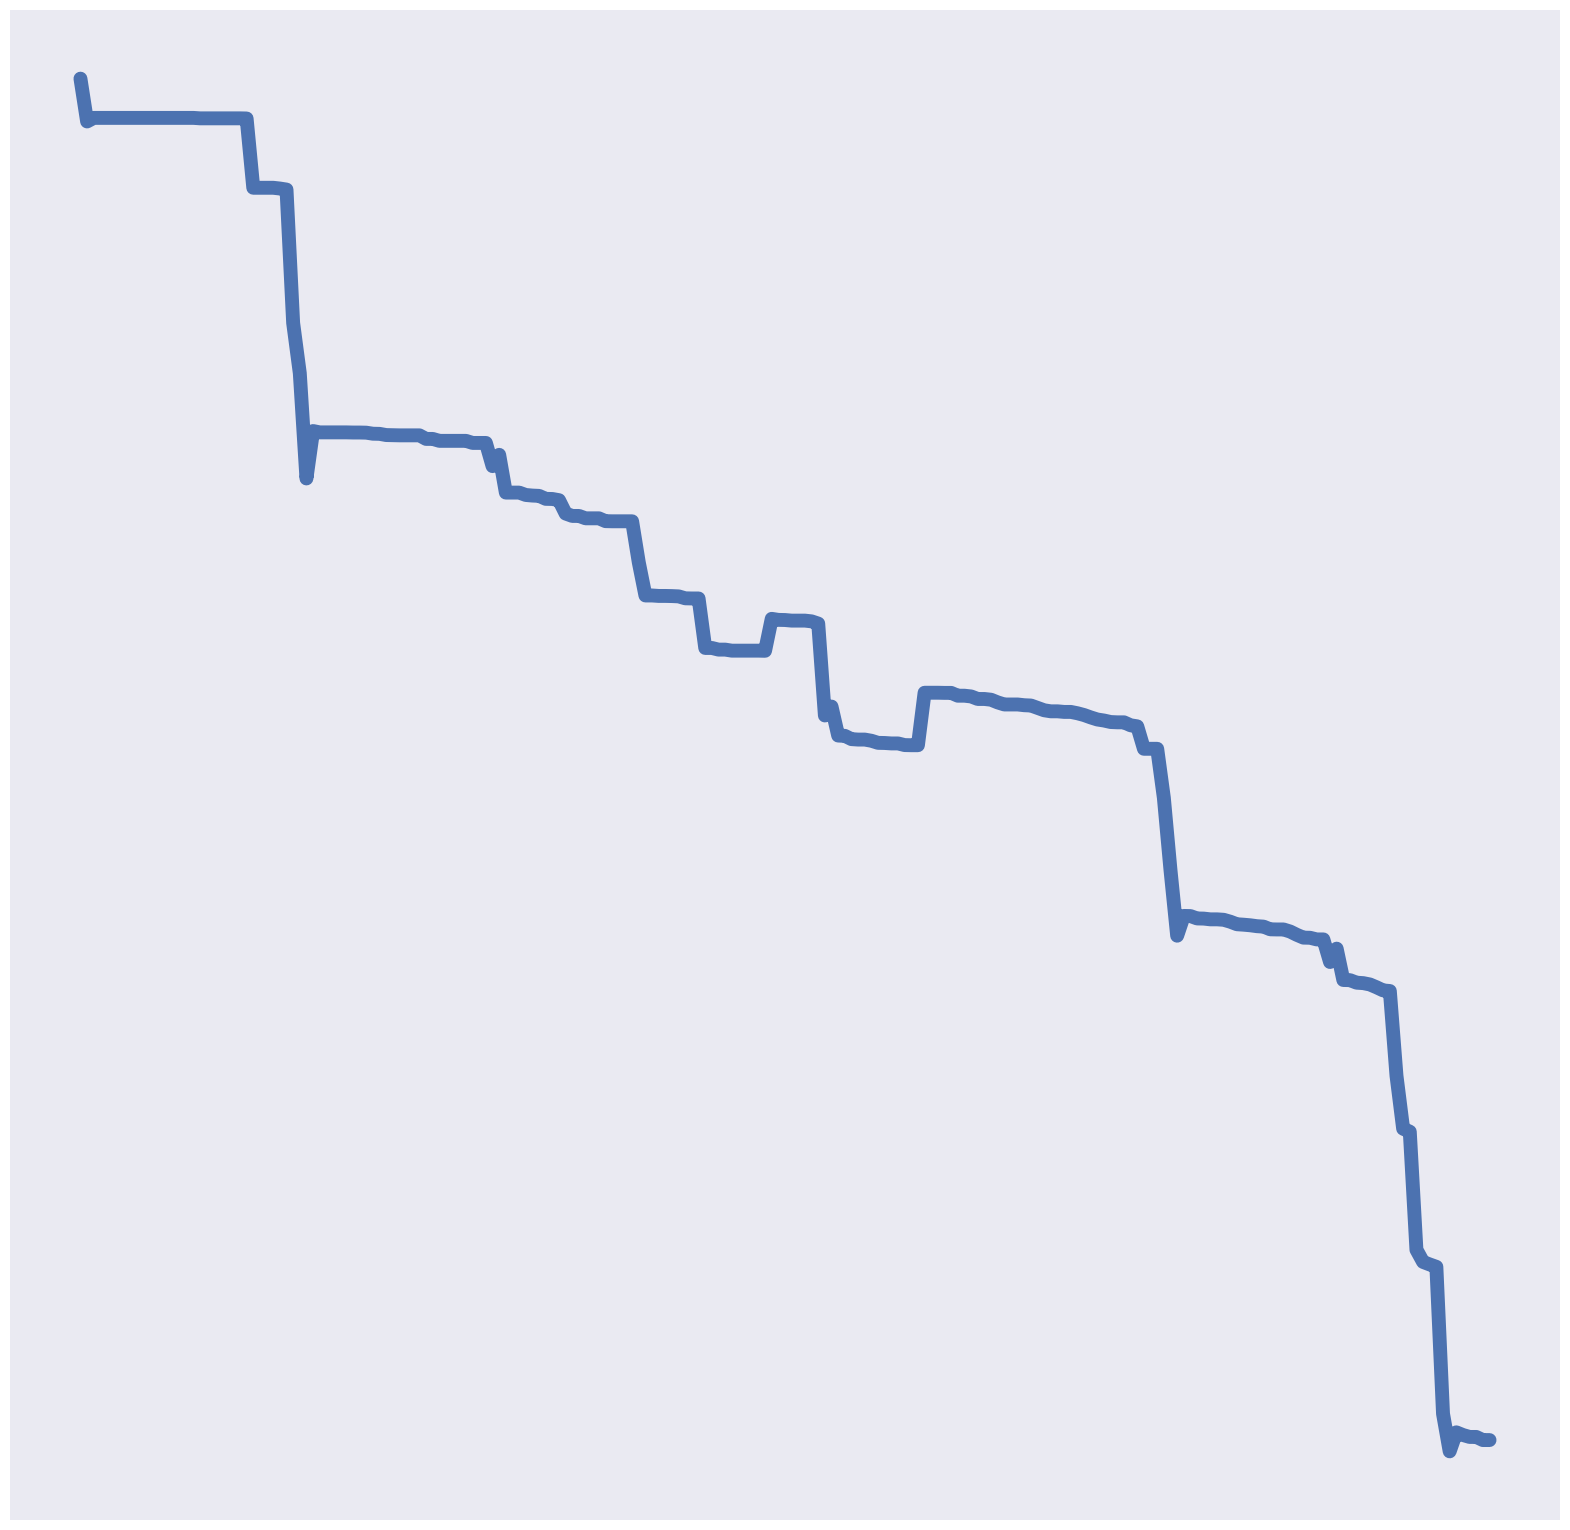

In [99]:
fig = plt.figure(figsize=(20,20))
x_restricted = x[np.where((x>40)&(x<42))]
y_restricted = y[np.where((x>40)&(x<42))]
sns.set(font_scale = 2.5)
plt.plot(x_restricted,y_restricted,lw=10)
# plt.scatter(32+32*32.*fractional_positions/n, fractional_values)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [64]:
random_folder = '/data/medoid_bandit/E18_Mice/computed_values/RAND_100k_sanity/'
truths = np.zeros((32,))
for flname in os.listdir(random_folder):
    if not flname.endswith('.pkl'):
        continue
    with open(random_folder+flname,'rb') as f:
        x=pickle.load(f)
        truths += [z[0]==103077 for z in x]    

truths = np.array(truths)/(len(os.listdir(random_folder))+0.0)
mab_folder = '/data/medoid_bandit/E18_Mice/computed_values/rna_seq100k/mab/'
mab = []
m = 15000
print len(os.listdir(mab_folder))
for flname in os.listdir(mab_folder):
    if not flname.endswith('.pkl'):
        continue
    print flname,
    with open(mab_folder+flname,'rb') as f:
        x=pickle.load(f)
        answer = x[0][:np.where(x[0]==0)[0][0]]
        mab += [np.pad(answer==103077, (0,m-len(answer)), 'edge')]    
mab_error = 1-np.array(mab).mean(axis=0)
mab_arm = 32+np.arange(0, mab_error.shape[0])*32*32/110000.0

1859
0.pkl 8.pkl 1.pkl 9.pkl 2.pkl 3.pkl 144.pkl 48.pkl 40.pkl 200.pkl 128.pkl 56.pkl 240.pkl 152.pkl 168.pkl 88.pkl 216.pkl 120.pkl 192.pkl 248.pkl 232.pkl 136.pkl 64.pkl 176.pkl 72.pkl 112.pkl 80.pkl 184.pkl 208.pkl 160.pkl 104.pkl 32.pkl 24.pkl 16.pkl 96.pkl 224.pkl 145.pkl 49.pkl 217.pkl 129.pkl 153.pkl 73.pkl 201.pkl 169.pkl 41.pkl 193.pkl 209.pkl 249.pkl 121.pkl 89.pkl 65.pkl 233.pkl 25.pkl 57.pkl 177.pkl 81.pkl 241.pkl 33.pkl 185.pkl 137.pkl 105.pkl 225.pkl 97.pkl 17.pkl 161.pkl 113.pkl 146.pkl 50.pkl 130.pkl 170.pkl 218.pkl 202.pkl 234.pkl 90.pkl 66.pkl 74.pkl 26.pkl 58.pkl 194.pkl 154.pkl 250.pkl 42.pkl 34.pkl 138.pkl 178.pkl 82.pkl 122.pkl 186.pkl 210.pkl 242.pkl 106.pkl 18.pkl 10.pkl 98.pkl 226.pkl 114.pkl 162.pkl 51.pkl 171.pkl 131.pkl 147.pkl 219.pkl 91.pkl 195.pkl 235.pkl 203.pkl 27.pkl 83.pkl 155.pkl 59.pkl 67.pkl 139.pkl 35.pkl 43.pkl 75.pkl 243.pkl 187.pkl 179.pkl 19.pkl 251.pkl 107.pkl 123.pkl 211.pkl 11.pkl 99.pkl 163.pkl 115.pkl 227.pkl 52.pkl 132.pkl 172.pkl 148.pk

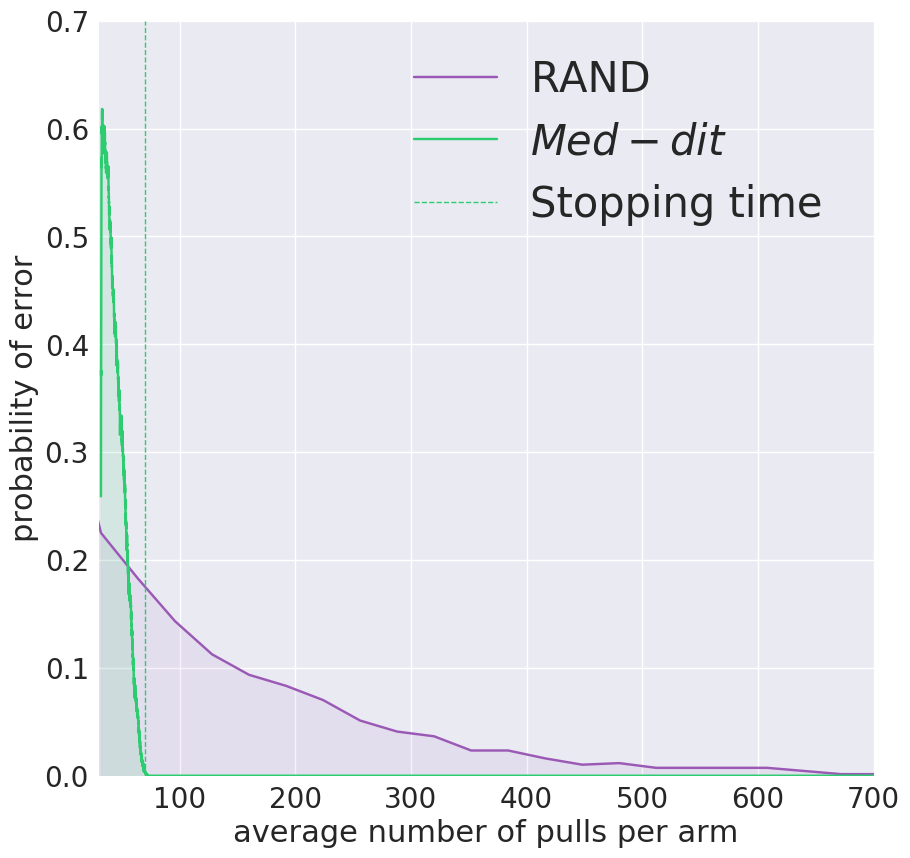

In [65]:
mab_avg_stopping_time = 70
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
xaxis = np.arange(len(truths))*32
mab_arm[-1] = xaxis[-1]
plt.plot(xaxis, 1-truths, label='RAND', color=colors[0])
plt.fill_between(xaxis, 1-truths,0, color=colors[0], alpha=0.08)
plt.plot(mab_arm, mab_error, label='$Med-dit$',  color=colors[-1])
plt.fill_between(mab_arm, mab_error,0,  color=colors[-1],alpha=0.12)
plt.axvline(mab_avg_stopping_time, linestyle='--', lw=1, color=colors[-1], label="Stopping time ")
plt.legend(prop={'size': 30})
plt.xlabel('average number of pulls per arm')
plt.ylabel('probability of error')
plt.xlim((30,700))
plt.ylim((0,0.7))
plt.show()